In [1]:
import sys
if 'google.colab' in sys.modules:
    !git clone  https://github.com/ecastillot/delaware.git ./delaware
    !pip install obspy
    

In [3]:
import sys
import os

version = "10102024"

if 'google.colab' in sys.modules:
    dw_path = os.path.join("/content/delaware",version)
else:
    dw_path = os.path.join("/home/emmanuel/ecastillo/dev/delaware",version)
    
sys.path.append(dw_path)

# Stations

In [4]:
import pandas as pd
import os

stations_relpath = "data_git/stations/standard_stations.csv"
stations_path = os.path.join(dw_path,stations_relpath)
stations = pd.read_csv(stations_path)
stations_columns = ["network","station","latitude","longitude","elevation","x[km]","y[km]"]
stations = stations[stations_columns]
stations

network station   latitude   longitude  elevation         x[km]  \
0       4O    WB01  31.721667 -104.060278    0.92700 -11583.937159   
1       4O    CT01  31.902850 -104.144532    0.99400 -11593.316271   
2       4O    SA02  31.671630 -104.264900    0.76000 -11606.715576   
3       4O    SA04  31.755930 -104.254580    0.76000 -11605.566758   
4       4O    SA06  31.756960 -104.149710    0.76000 -11593.892683   
5       4O    WB02  31.736302 -103.944920    0.93200 -11571.095621   
6       4O    WB03  31.610722 -103.968839    0.99400 -11573.758171   
7       4O    SA07  31.865780 -104.364810    1.10300 -11617.837506   
8       4O    WB04  31.530513 -103.950319    0.96189 -11571.696579   
9       4O    WB05  31.753781 -103.832948    0.85481 -11558.630888   
10      4O    CV01  31.850400 -104.088900    0.98300 -11587.123345   
11      4O    BP01  31.840900 -103.824400    0.80600 -11557.679340   
12      TX    PB09  31.774145 -104.301444    1.13900 -11610.783635   
13      TX    PB13  31.554200 -103.845800    0.95610 -11560.061577   
14      TX    PB29  31.752990 -104.514453    1.24200 -11634.495688   
15      TX    PB28  31.668640 -104.500770    1.20400 -11632.972504   
16      TX    PB31  31.732260 -104.030536    0.90700 -11580.626294   
17      TX    PB33  31.534929 -104.054045    1.00600 -11583.243304   
18      TX    PB34  31.676667 -104.037778    0.96930 -11581.432470   
19      TX    PB35  31.656187 -104.432030    1.22400 -11625.320402   
20      TX    PB37  31.718470 -104.528416    1.26300 -11636.050043   
21      TX    PB38  31.729720 -104.426634    1.24000 -11624.719722   
22      TX    PB40  31.641994 -103.933959    0.93500 -11569.875370   
23      TX    PB43  31.680019 -103.864872    0.89600 -11562.184662   
24      TX    PB20  31.628100 -104.061790    1.02200 -11584.105474   
25      TX    PB23  31.664040 -104.072760    1.00500 -11585.326649   
26      TX    PB24  31.619790 -104.017760    0.99700 -11579.204077   
27      TX    PB25  31.583080 -104.070190    1.03700 -11585.040558   
28      TX    PB26  31.578190 -104.125790    1.06500 -11591.229921   
29      TX    PB36  31.680262 -104.425899    1.21800 -11624.637902   
30      TX    PB39  31.721691 -104.060349    0.95000 -11583.945062   
31      TX    PB56  31.803278 -103.870345    0.86700 -11562.793903   
32      TX    PB55  31.802823 -103.938104    0.91300 -11570.336834   
33      TX    PB57  31.769228 -103.965278    0.91900 -11573.361807   
34      TX    PB58  31.699787 -103.932653    0.89500 -11569.730009   
35      TX    PB59  31.889954 -104.812040    1.70500 -11667.622922   

          y[km]  
0   3726.830293  
1   3750.564925  
2   3720.283725  
3   3731.315115  
4   3731.449961  
5   3728.745711  
6   3712.319547  
7   3745.705033  
8   3701.839715  
9   3731.033735  
10  3743.689282  
11  3742.444351  
12  3733.700025  
13  3704.933658  
14  3730.930221  
15  3719.892641  
16  3728.216676  
17  3702.416463  
18  3720.942579  
19  3718.263960  
20  3726.411909  
21  3727.884233  
22  3716.407911  
23  3721.381050  
24  3714.591366  
25  3719.290999  
26  3713.504982  
27  3708.706963  
28  3708.067980  
29  3721.412837  
30  3726.833433  
31  3737.515392  
32  3737.455755  
33  3733.056151  
34  3723.967199  
35  3748.874032

# Custom Client: Catalog with picks

In [5]:
from obspy import UTCDateTime
from delaware.core.client import CustomClient
from delaware.loc.inv import prepare_cat2inv

provider = "USGS"
station_names = ["WB03"]
radius = [1]
starttime=UTCDateTime("2023-01-01 15:26:30")
endtime=UTCDateTime("2024-01-30 15:26:32")


db = {"catalog":[],
      "picks":[]}
for i,sta_name in enumerate(station_names):
    station_row = stations[stations["station"].isin([sta_name])]
    station_row = station_row.drop_duplicates(subset=["station"],ignore_index=True)
    print(station_row.loc[0].station)
    
    client =  CustomClient(provider)
    sta_cat,sta_picks,_ = client.get_custom_events(
                            latitude=station_row.loc[0].latitude,
                            longitude=station_row.loc[0].longitude,
                            maxradius=radius[i]/111,
                            includeallorigins=True,
                            starttime=starttime,
                            endtime=endtime)
    sta_cat,sta_picks = prepare_cat2inv(sta_cat,sta_picks,attach_station=stations)
    if not sta_cat.empty:
        db["catalog"].append(sta_cat)
    if not sta_picks.empty:
        db["picks"].append(sta_picks)

for key,data in db.items():
    if data:
        db[key] = pd.concat(data)
    else:
        raise Exception(f"No data for {key}")

print(db)

WB03


/home/emmanuel/ecastillo/dev/delaware/10102024/delaware/core/client.py:712: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_picks = pd.concat(all_picks, axis=0)


{'catalog':               ev_id                origin_time  eq_latitude  eq_longitude  \
0    texnet2023acht 2023-01-02 06:11:37.408351    31.615244   -103.968559   
1    texnet2023adtw 2023-01-03 01:26:09.031757    31.612004   -103.975539   
2    texnet2023agjl 2023-01-04 11:36:42.744357    31.610174   -103.972841   
3    texnet2023agjq 2023-01-04 11:40:58.776109    31.606508   -103.969597   
4    texnet2023akej 2023-01-06 13:32:22.613913    31.613000   -103.977000   
..              ...                        ...          ...           ...   
205  texnet2024absh 2024-01-01 22:22:45.982513    31.615000   -103.971000   
206  texnet2024agra 2024-01-04 15:25:30.684960    31.614000   -103.961000   
207  texnet2024anyy 2024-01-08 15:22:08.156378    31.609000   -103.963000   
208  texnet2024augx 2024-01-12 02:12:02.773522    31.605000   -103.966000   
209  texnet2024bwbc 2024-01-27 07:04:20.072420    31.612000   -103.966000   

     magnitude  
0          2.4  
1          1.9  
2          2

# Waveforms

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def group_data_by_station(st, window_lp, window_rp,ev_id=None):
    """
    Group seismic data by station and generate time windows.

    Parameters:
    - st: ObsPy Stream object containing seismic traces.
    - window_lp: float, left point of the window in seconds.
    - window_rp: float, right point of the window in seconds.

    Returns:
    - data_grouped: dict, where keys are station identifiers, and values are data arrays.
    """
    data_grouped = {}
    st_grouped = st.copy()
    st_grouped = st_grouped._groupby('{network}.{station}.{channel}')
    
    if ev_id is None:
        ev_id = ""
    
    for station_id, single_st in st_grouped.items():
        str_id = ".".join((station_id,ev_id))
        endpoint = window_lp + window_rp
        sampling_rate = int(single_st[0].stats.sampling_rate)
        
        t = np.linspace(0, endpoint, int(sampling_rate * endpoint) + 1)
        y = np.zeros_like(t)  # Create an array of zeros with the same length as `t`
        
        y[:len(single_st[0].data)] = single_st[0].data
        xy_data = np.column_stack((t, y))
        data_grouped[str_id] = xy_data
    
    return data_grouped


# group_data_by_station(st,window_lp,window_rp)

In [82]:
st

0 Trace(s) in Stream:


In [83]:
import datetime as datetime
from obspy.clients.fdsn import Client

station_picks = None
window_lp = 5
window_rp = 20

padding = 2 #padding
pre_filt=[0.05,1,40,40.05]

wav_provider = "TEXNET"
wav_client = Client(wav_provider)

wav_data = {}
for _,event in db["catalog"].iterrows():
    
    ev_id = event.ev_id
    # print(event.ev_id)
    picks = db["picks"].copy()
    picks = picks[picks["ev_id"]==ev_id]
    
    if station_picks is not None:
        picks = picks[picks["station"].isin(station_picks)]
    
    grouped_picks = picks.groupby("station")
    
    
    for sta_name, data in grouped_picks.__iter__():
        strid = ".".join((sta_name,ev_id))
        
        print(strid)
        row = data.iloc[0]
        
        lp_shift = datetime.timedelta(seconds=row.tt_P) - datetime.timedelta(seconds=window_lp) 
        rp_shift = datetime.timedelta(seconds=row.tt_P) + datetime.timedelta(seconds=window_rp) 
        
        wav_starttime = event.origin_time + lp_shift
        wav_endtime = event.origin_time + rp_shift
        
        pretrim_wav_starttime = wav_starttime - datetime.timedelta(seconds=padding)
        pretrim_wav_endtime = wav_endtime + datetime.timedelta(seconds=padding)
        
        # wav_data[strid] = 
        try:
            st = wav_client.get_waveforms(network="*",station=sta_name,
                                          location="*",channel="*",
                                    starttime=UTCDateTime(pretrim_wav_starttime),
                                    endtime=UTCDateTime(pretrim_wav_endtime))
        except Exception as e:
            print(f"Wav not found {strid}: {e}")
        
        if len(st)== 0:
            continue
        
        stats = st[0].stats
        
        try:
            inv = wav_client.get_stations(network=stats.network,
                                        station=stats.station,
                                        level="response",
                                        starttime=UTCDateTime(pretrim_wav_starttime),
                                        endtime=UTCDateTime(pretrim_wav_endtime))

            st.remove_response(inventory=inv,
                               zero_mean=True,
                               pre_filt=pre_filt) # filtering more than 1 hz
        except:
            print(f"Response not found {strid}")
            
        st = st.trim(starttime=UTCDateTime(wav_starttime),
                    endtime=UTCDateTime(wav_endtime))
        st= st.normalize(global_max=False)
        
        # print(st)
        # break
        grouped_data = group_data_by_station(st,window_lp,window_rp,ev_id)   


        
        # print(grouped_data)
        # break
        for key, val in grouped_data.items():
            wav_data[key] = val
    #     print(strid ,wav_starttime,wav_endtime)
    #     print(st)
    # break
print(wav_data)

/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emma

Wav not found PB13.texnet2023bpct: No data available for request.
HTTP Status code: 204
Detailed response of server:


Wav not found PB23.texnet2023bpct: No data available for request.
HTTP Status code: 204
Detailed response of server:


Wav not found PB24.texnet2023bpct: No data available for request.
HTTP Status code: 204
Detailed response of server:


Wav not found PB26.texnet2023bpct: No data available for request.
HTTP Status code: 204
Detailed response of server:


Wav not found PB29.texnet2023bpct: No data available for request.
HTTP Status code: 204
Detailed response of server:


Wav not found PB33.texnet2023bpct: No data available for request.
HTTP Status code: 204
Detailed response of server:


Wav not found PB34.texnet2023bpct: No data available for request.
HTTP Status code: 204
Detailed response of server:


Wav not found PB35.texnet2023bpct: No data available for request.
HTTP Status code: 204
Detailed response of server:


Wav not found PB37.texnet2023bpct: No data avail

/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emma

Response not found PB34.texnet2023tkta
Response not found PB35.texnet2023tkta
Response not found PB37.texnet2023tkta
Response not found PB38.texnet2023tkta


/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emma

{'4O.CT01.HHE.texnet2023acht': array([[ 0.00000000e+00, -1.90741297e-02],
       [ 5.00000000e-03, -2.25524841e-02],
       [ 1.00000000e-02, -1.14934241e-02],
       ...,
       [ 2.49900000e+01, -1.90795413e-02],
       [ 2.49950000e+01, -4.02926530e-02],
       [ 2.50000000e+01, -7.07745426e-02]]), '4O.CT01.HHN.texnet2023acht': array([[ 0.00000000e+00,  2.14676908e-02],
       [ 5.00000000e-03,  1.29728795e-03],
       [ 1.00000000e-02, -2.12874858e-02],
       ...,
       [ 2.49900000e+01, -5.47482959e-03],
       [ 2.49950000e+01,  1.83799015e-02],
       [ 2.50000000e+01,  3.85165070e-02]]), '4O.CT01.HHZ.texnet2023acht': array([[ 0.00000000e+00, -1.80500374e-04],
       [ 5.00000000e-03, -1.00507613e-02],
       [ 1.00000000e-02, -1.69775688e-02],
       ...,
       [ 2.49900000e+01,  2.35428731e-02],
       [ 2.49950000e+01,  1.38974093e-02],
       [ 2.50000000e+01,  8.10722037e-04]]), '4O.CV01.HHE.texnet2023acht': array([[ 0.00000000e+00, -3.39683993e-03],
       [ 5.00000000e

In [ ]:
import fnmatch

def query_dictionary(data_dict, network="*", station="*", channel="*", event_id="*"):
    """
    Query a dictionary with keys in the format 'network.station.channel.event_id' 
    using wildcard patterns.

    Parameters:
    - data_dict: dict, the dictionary to search, with keys in the format 'network.station.channel.event_id'.
    - network: str, wildcard pattern for the network (default is "*", matching all).
    - station: str, wildcard pattern for the station (default is "*", matching all).
    - channel: str, wildcard pattern for the channel (default is "*", matching all).
    - event_id: str, wildcard pattern for the event ID (default is "*", matching all).

    Returns:
    - dict, filtered dictionary containing only the keys that match the patterns.
    """
    filtered_dict = {}

    for key, value in data_dict.items():
        key_parts = key.split(".")
        if len(key_parts) != 4:
            continue  # Skip keys that don't match the expected format
        
        key_network, key_station, key_channel, key_event_id = key_parts
        
        # Apply pattern matching using fnmatch
        if (fnmatch.fnmatch(key_network, network) and
            fnmatch.fnmatch(key_station, station) and
            fnmatch.fnmatch(key_channel, channel) and
            fnmatch.fnmatch(key_event_id, event_id)):
            filtered_dict[key] = value

    return filtered_dict


Text(0.5, 0.98, 'Station WB03 ')

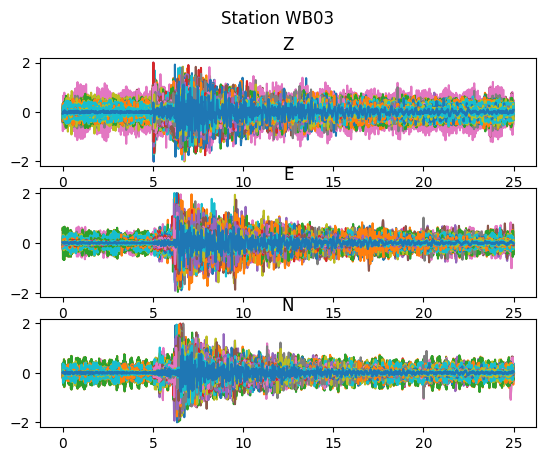

In [254]:
sta = "WB03"

z_data = query_dictionary(wav_data,station=sta,channel="*Z")
e_data = query_dictionary(wav_data,station=sta,channel="*E")
n_data = query_dictionary(wav_data,station=sta,channel="*N")

comp_data = {"Z":z_data,"E":e_data,"N":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)

for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    for key,tr in data.items():
        t = tr[:, 0]  # First column
        y = tr[:, 1]        # Second column
        axes[n].plot(t,y)
        axes[n].set_title(comp)
fig.suptitle(f"Station {sta} ")

Text(0.5, 0.98, 'Station PB20 ')

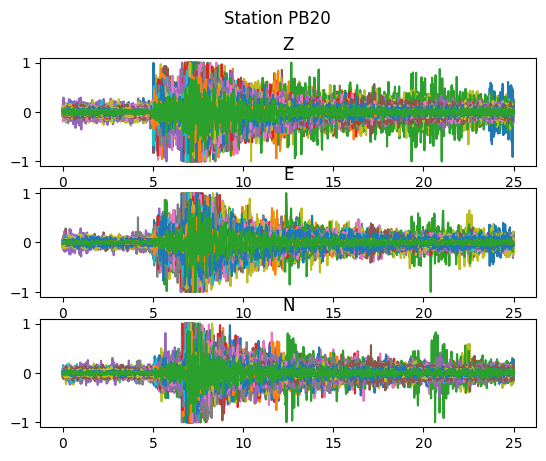

In [255]:
sta = "PB20"

z_data = query_dictionary(wav_data,station=sta,channel="HHZ")
e_data = query_dictionary(wav_data,station=sta,channel="HHE")
n_data = query_dictionary(wav_data,station=sta,channel="HHN")

comp_data = {"Z":z_data,"E":e_data,"N":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)

for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    for key,tr in data.items():
        t = tr[:, 0]  # First column
        y = tr[:, 1]        # Second column
        axes[n].plot(t,y)
        axes[n].set_title(comp)
fig.suptitle(f"Station {sta} ")

Text(0.5, 0.98, 'Station PB26 ')

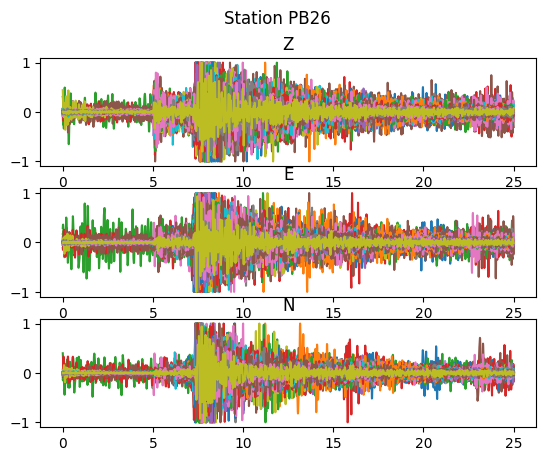

In [256]:
sta = "PB26"

z_data = query_dictionary(wav_data,station=sta,channel="HHZ")
e_data = query_dictionary(wav_data,station=sta,channel="HHE")
n_data = query_dictionary(wav_data,station=sta,channel="HHN")

comp_data = {"Z":z_data,"E":e_data,"N":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)

for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    for key,tr in data.items():
        t = tr[:, 0]  # First column
        y = tr[:, 1]        # Second column
        axes[n].plot(t,y)
        axes[n].set_title(comp)
fig.suptitle(f"Station {sta} ")

Text(0.5, 0.98, 'Station SA04 ')

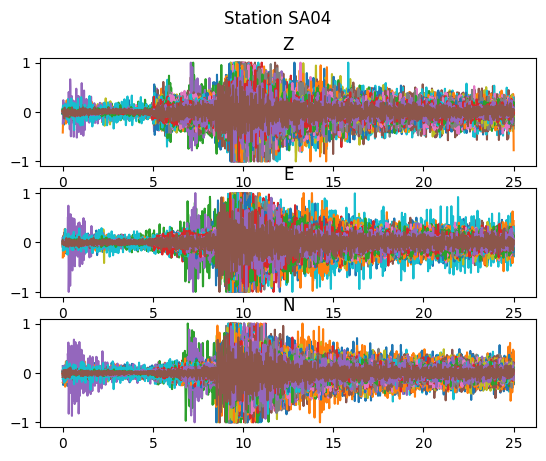

In [257]:
sta = "SA04"

z_data = query_dictionary(wav_data,station=sta,channel="HHZ")
e_data = query_dictionary(wav_data,station=sta,channel="HHE")
n_data = query_dictionary(wav_data,station=sta,channel="HHN")

comp_data = {"Z":z_data,"E":e_data,"N":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)

for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    for key,tr in data.items():
        t = tr[:, 0]  # First column
        y = tr[:, 1]        # Second column
        axes[n].plot(t,y)
        axes[n].set_title(comp)
fig.suptitle(f"Station {sta} ")

Text(0.5, 0.98, 'Station SA07 ')

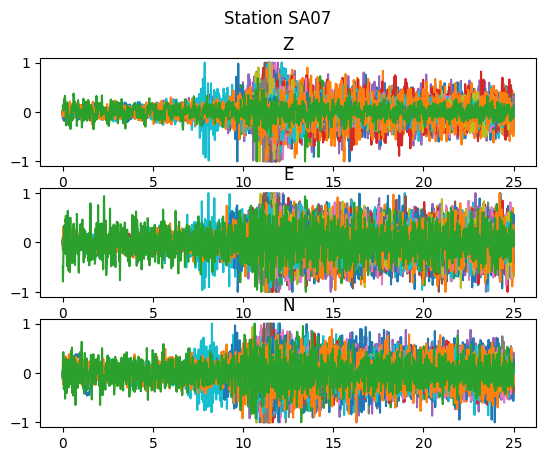

In [259]:
sta = "SA07"

z_data = query_dictionary(wav_data,station=sta,channel="*Z")
e_data = query_dictionary(wav_data,station=sta,channel="*E")
n_data = query_dictionary(wav_data,station=sta,channel="*N")

comp_data = {"Z":z_data,"E":e_data,"N":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)

# print(comp_data)
for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    for key,tr in data.items():
        if (np.median(tr[:,1])) > 0.95 or (max(tr[:, 1])<0.01) :
            continue
        # t = tr[450:1400, 0]  # First column
        # y = tr[450:1400, 1]        # Second column
        t = tr[:, 0]  # First column
        y = tr[:, 1]        # Second column
        axes[n].plot(t,y)
        axes[n].set_title(comp)
fig.suptitle(f"Station {sta} ")

Text(0.5, 0.98, 'Station PB36 ')

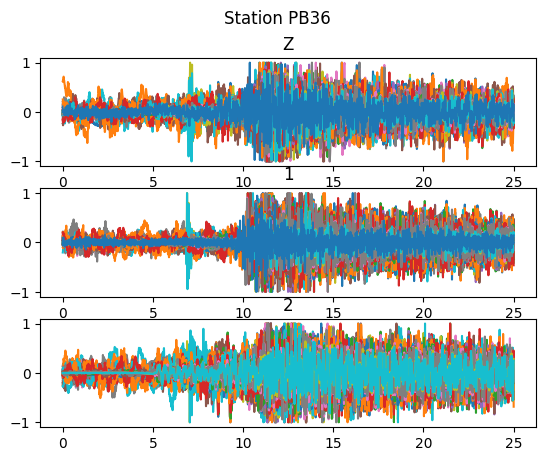

In [262]:
sta = "PB36"

z_data = query_dictionary(wav_data,station=sta,channel="*Z")
e_data = query_dictionary(wav_data,station=sta,channel="*1")
n_data = query_dictionary(wav_data,station=sta,channel="*2")

comp_data = {"Z":z_data,"1":e_data,"2":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)

# print(comp_data)
for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    for key,tr in data.items():
        if (np.median(tr[:,1])) > 0.95 or (max(tr[:, 1])<0.01) :
            continue
        # t = tr[450:1400, 0]  # First column
        # y = tr[450:1400, 1]        # Second column
        t = tr[:, 0]  # First column
        y = tr[:, 1]        # Second column
        axes[n].plot(t,y)
        axes[n].set_title(comp)
fig.suptitle(f"Station {sta} ")

Text(0.5, 0.98, 'Station PB35 ')

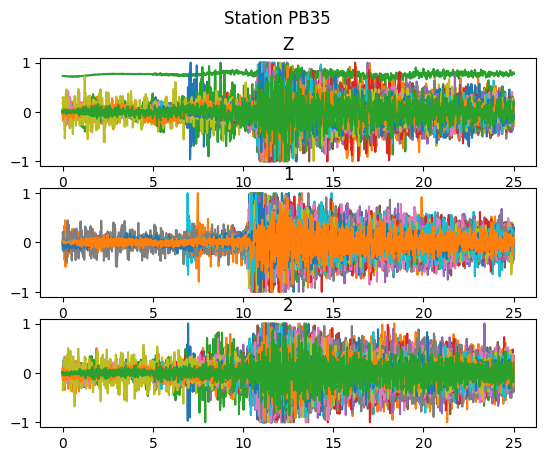

In [269]:
sta = "PB35"

z_data = query_dictionary(wav_data,station=sta,channel="HHZ")
e_data = query_dictionary(wav_data,station=sta,channel="HH1")
n_data = query_dictionary(wav_data,station=sta,channel="HH2")

comp_data = {"Z":z_data,"1":e_data,"2":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)

# print(comp_data)
for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    for key,tr in data.items():
        if (np.median(tr[:,1])) > 0.95 or (max(tr[:, 1])<0.01) :
            continue
        # t = tr[450:1400, 0]  # First column
        # y = tr[450:1400, 1]        # Second column
        t = tr[:, 0]  # First column
        y = tr[:, 1]        # Second column
        axes[n].plot(t,y)
        axes[n].set_title(comp)
fig.suptitle(f"Station {sta} ")

Text(0.5, 0.98, 'Station PB28 ')

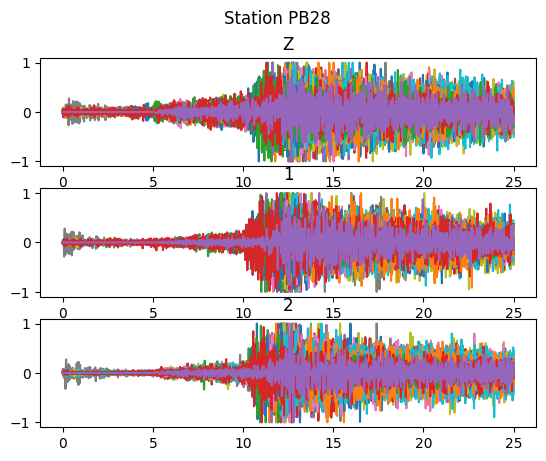

In [270]:
sta = "PB28"

z_data = query_dictionary(wav_data,station=sta,channel="HHZ")
e_data = query_dictionary(wav_data,station=sta,channel="HH1")
n_data = query_dictionary(wav_data,station=sta,channel="HH2")

comp_data = {"Z":z_data,"1":e_data,"2":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)

# print(comp_data)
for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    for key,tr in data.items():
        if (np.median(tr[:,1])) > 0.95 or (max(tr[:, 1])<0.01) :
            continue
        # t = tr[450:1400, 0]  # First column
        # y = tr[450:1400, 1]        # Second column
        t = tr[:, 0]  # First column
        y = tr[:, 1]        # Second column
        axes[n].plot(t,y)
        axes[n].set_title(comp)
fig.suptitle(f"Station {sta} ")

Text(0.5, 0.98, 'Station PB37 ')

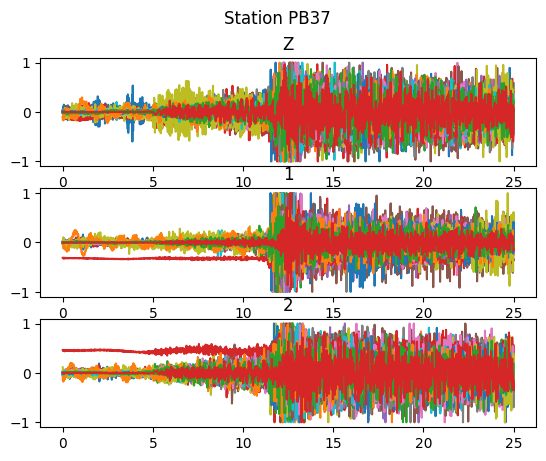

In [271]:
sta = "PB37"

z_data = query_dictionary(wav_data,station=sta,channel="HHZ")
e_data = query_dictionary(wav_data,station=sta,channel="HH1")
n_data = query_dictionary(wav_data,station=sta,channel="HH2")

comp_data = {"Z":z_data,"1":e_data,"2":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)

# print(comp_data)
for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    for key,tr in data.items():
        if (np.median(tr[:,1])) > 0.95 or (max(tr[:, 1])<0.01) :
            continue
        # t = tr[450:1400, 0]  # First column
        # y = tr[450:1400, 1]        # Second column
        t = tr[:, 0]  # First column
        y = tr[:, 1]        # Second column
        axes[n].plot(t,y)
        axes[n].set_title(comp)
fig.suptitle(f"Station {sta} ")

Text(0.5, 0.98, 'Station PB29 ')

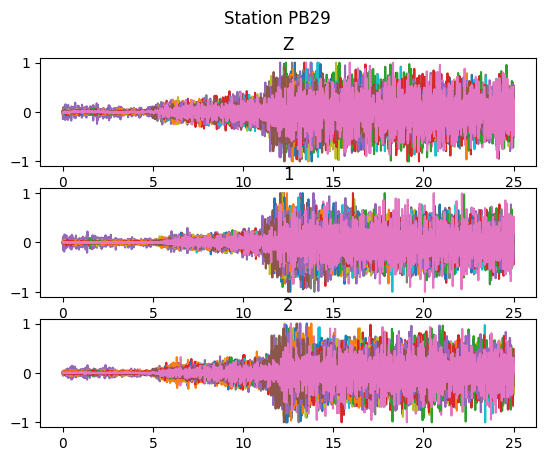

In [272]:
sta = "PB29"

z_data = query_dictionary(wav_data,station=sta,channel="HHZ")
e_data = query_dictionary(wav_data,station=sta,channel="HH1")
n_data = query_dictionary(wav_data,station=sta,channel="HH2")

comp_data = {"Z":z_data,"1":e_data,"2":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)

# print(comp_data)
for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    for key,tr in data.items():
        if (np.median(tr[:,1])) > 0.95 or (max(tr[:, 1])<0.01) :
            continue
        # t = tr[450:1400, 0]  # First column
        # y = tr[450:1400, 1]        # Second column
        t = tr[:, 0]  # First column
        y = tr[:, 1]        # Second column
        axes[n].plot(t,y)
        axes[n].set_title(comp)
fig.suptitle(f"Station {sta} ")

<!-- # -->

# Spectrogram

component: Z
component: E
component: N


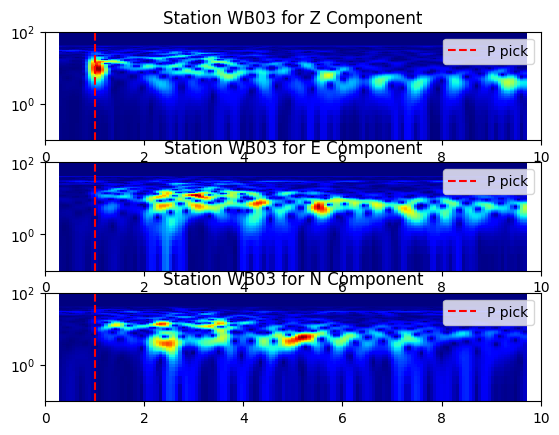

In [233]:
from obspy import Stream, Trace, UTCDateTime

sta = "WB03"
p = 4
pr = 10

z_data = query_dictionary(wav_data,station=sta,channel="*Z")
e_data = query_dictionary(wav_data,station=sta,channel="*E")
n_data = query_dictionary(wav_data,station=sta,channel="*N")

comp_data = {"Z":z_data,"E":e_data,"N":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)


for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    len_data = len(data)
    first_key = list(data.keys())[0]
    first_trace = data[first_key]
    
    t = first_trace[:, 0]
    y = np.zeros_like(t)
    h = 0
    for key,tr in data.items():
        if (np.median(tr[:,1])) > 0.95 or (max(tr[:, 1])<0.01) :
            len_data -= 1
        else:
            y += tr[:, 1]        # Second column
    
    # Calculate the sampling rate (assuming time_array is uniformly spaced)
    sampling_rate = 1 / (np.diff(t).mean())  # Samples per second
    # print(sampling_rate)
    
    print("component:",comp)
    # Convert data_array to an ObsPy Trace
    trace = Trace(data=y)
    trace.stats.starttime = UTCDateTime()  # Set to the current time, or use a specific start time
    trace.stats.sampling_rate = sampling_rate
    trace.trim(trace.stats.starttime+p,trace.stats.starttime+p+pr)
    trace.spectrogram(log=True,cmap='jet',axes=axes[n]) 
    
    
    axes[n].axvline(x=window_lp-p, color='r', linestyle='--', label="P pick")
    
    axes[n].set_title(f"Station {sta} for {comp} Component")
    axes[n].legend()

component: Z
component: E
component: N


/tmp/ipykernel_44730/1456551108.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[n].legend()


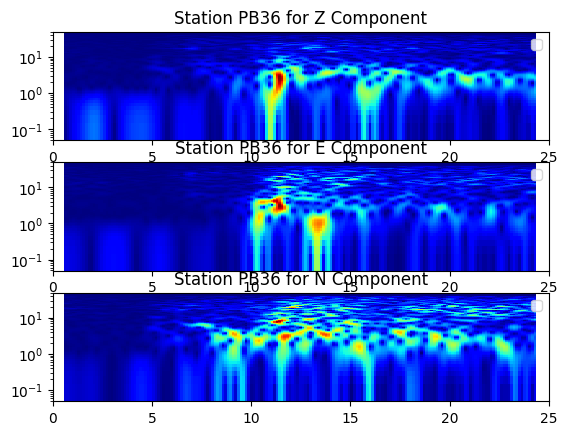

In [243]:
from obspy import Stream, Trace, UTCDateTime

sta = "PB36"
p = 4
pr = 10

z_data = query_dictionary(wav_data,station=sta,channel="HHZ")
e_data = query_dictionary(wav_data,station=sta,channel="HH1")
n_data = query_dictionary(wav_data,station=sta,channel="HH2")

comp_data = {"Z":z_data,"E":e_data,"N":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)


for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    len_data = len(data)
    first_key = list(data.keys())[0]
    first_trace = data[first_key]
    
    t = first_trace[:, 0]
    y = np.zeros_like(t)
    h = 0
    for key,tr in data.items():
        if (np.median(tr[:,1])) > 0.95 or (max(tr[:, 1])<0.01) :
            len_data -= 1
        else:
            y += tr[:, 1]        # Second column
    
    # Calculate the sampling rate (assuming time_array is uniformly spaced)
    sampling_rate = 1 / (np.diff(t).mean())  # Samples per second
    # print(sampling_rate)
    
    print("component:",comp)
    # Convert data_array to an ObsPy Trace
    trace = Trace(data=y)
    trace.stats.starttime = UTCDateTime()  # Set to the current time, or use a specific start time
    trace.stats.sampling_rate = sampling_rate
    # trace.trim(trace.stats.starttime+p,trace.stats.starttime+p+pr)
    trace.spectrogram(log=True,cmap='jet',axes=axes[n]) 
    
    
    # axes[n].axvline(x=window_lp-p, color='r', linestyle='--', label="P pick")
    
    axes[n].set_title(f"Station {sta} for {comp} Component")
    axes[n].legend()

100.0
component: Z
100.0
component: E
100.0
component: N


/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


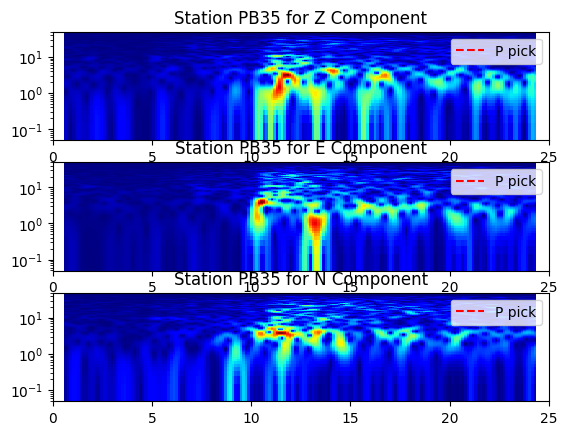

In [242]:
from obspy import Stream, Trace, UTCDateTime

sta = "PB35"

p = 4
pr = 10

z_data = query_dictionary(wav_data,station=sta,channel="HHZ")
e_data = query_dictionary(wav_data,station=sta,channel="HH1")
n_data = query_dictionary(wav_data,station=sta,channel="HH2")

comp_data = {"Z":z_data,"E":e_data,"N":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)


for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    len_data = len(data)
    first_key = list(data.keys())[0]
    first_trace = data[first_key]
    
    t = first_trace[:, 0]
    y = np.zeros_like(t)
    h = 0
    for key,tr in data.items():
        if (np.median(tr[:,1])) > 0.95 or (max(tr[:, 1])<0.01) :
            len_data -= 1
        else:
            y += tr[:, 1]        # Second column
    
    # Calculate the sampling rate (assuming time_array is uniformly spaced)
    sampling_rate = 1 / (np.diff(t).mean())  # Samples per second
    print(sampling_rate)
    
    print("component:",comp)
    # Convert data_array to an ObsPy Trace
    trace = Trace(data=y)
    trace.stats.starttime = UTCDateTime()  # Set to the current time, or use a specific start time
    trace.stats.sampling_rate = sampling_rate
    # trace.trim(trace.stats.starttime+p,trace.stats.starttime+p+pr)
    trace.trim(starttime=trace.stats.starttime)
    # print(trace)
    # break
    trace.spectrogram(log=True,cmap='jet',axes=axes[n]) 
    
    
    axes[n].axvline(x=trace.stats.sampling_rate, color='r', linestyle='--', label="P pick")
    
    axes[n].set_title(f"Station {sta} for {comp} Component")
    axes[n].legend() 
    
    